In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

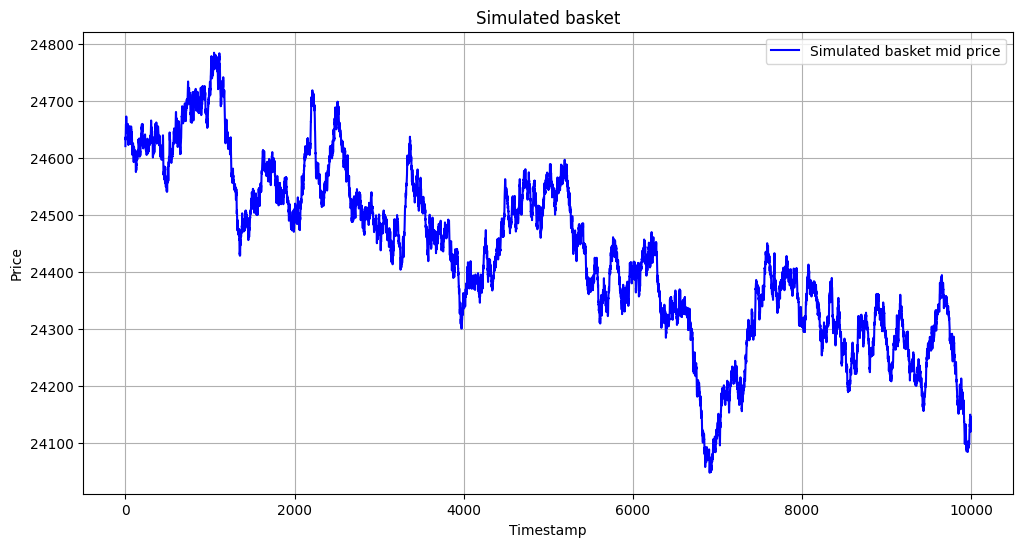

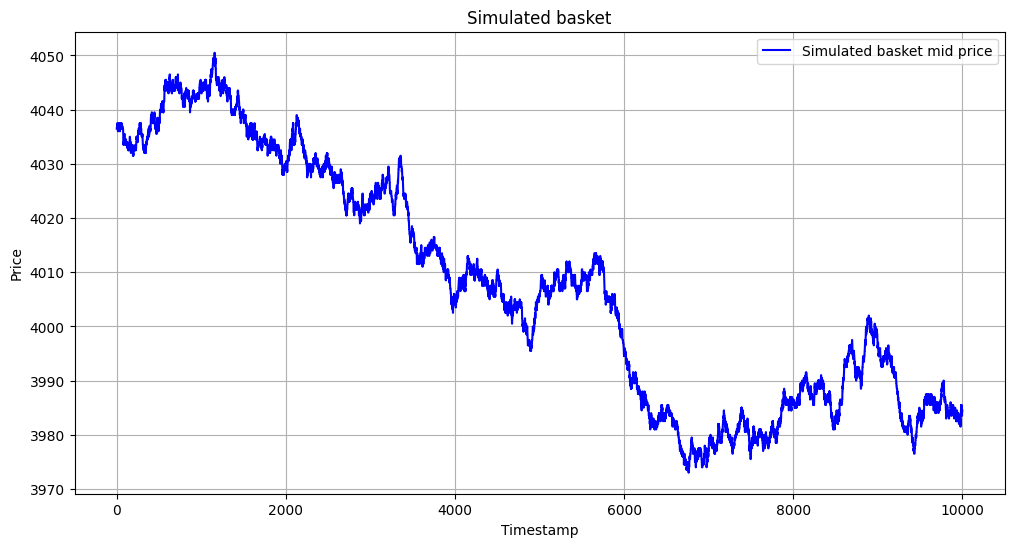

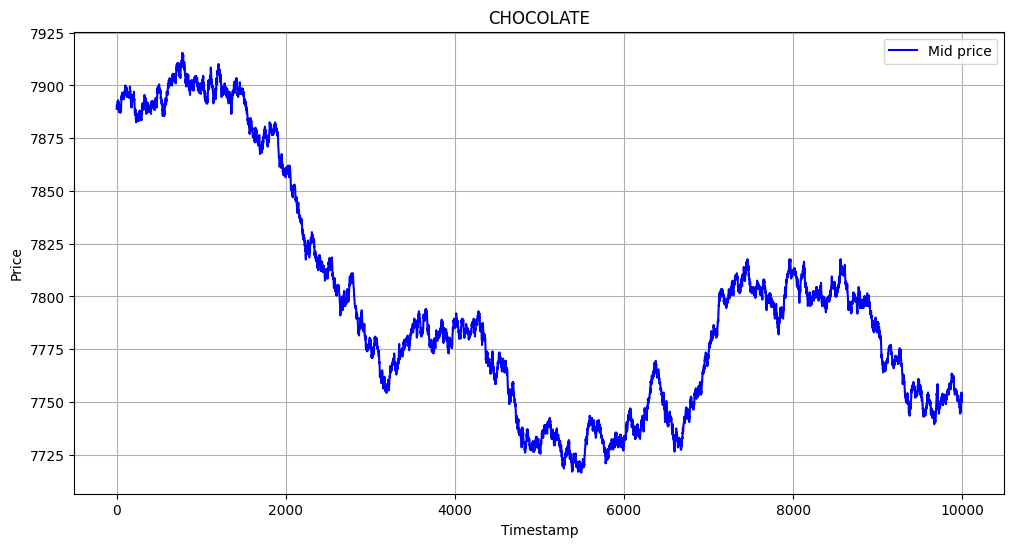

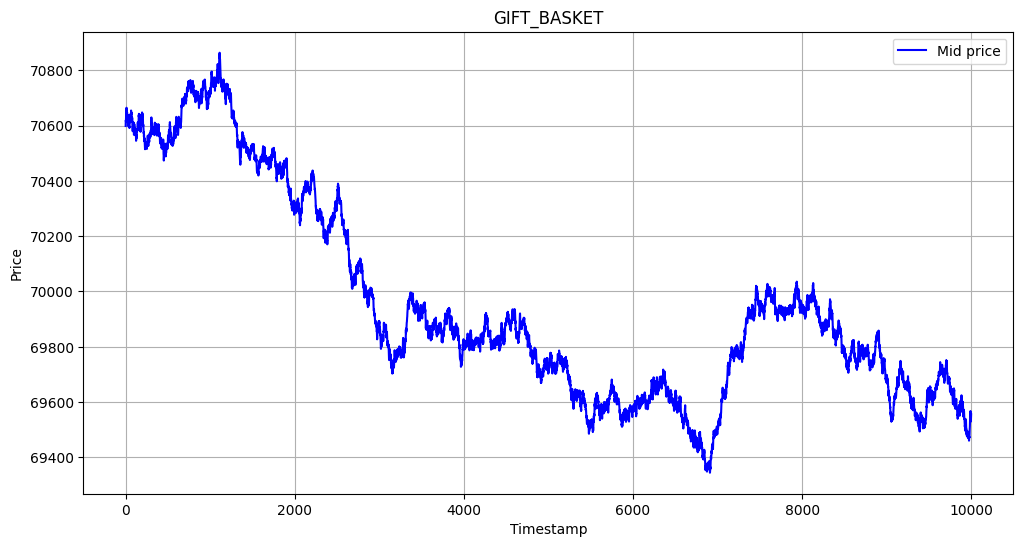

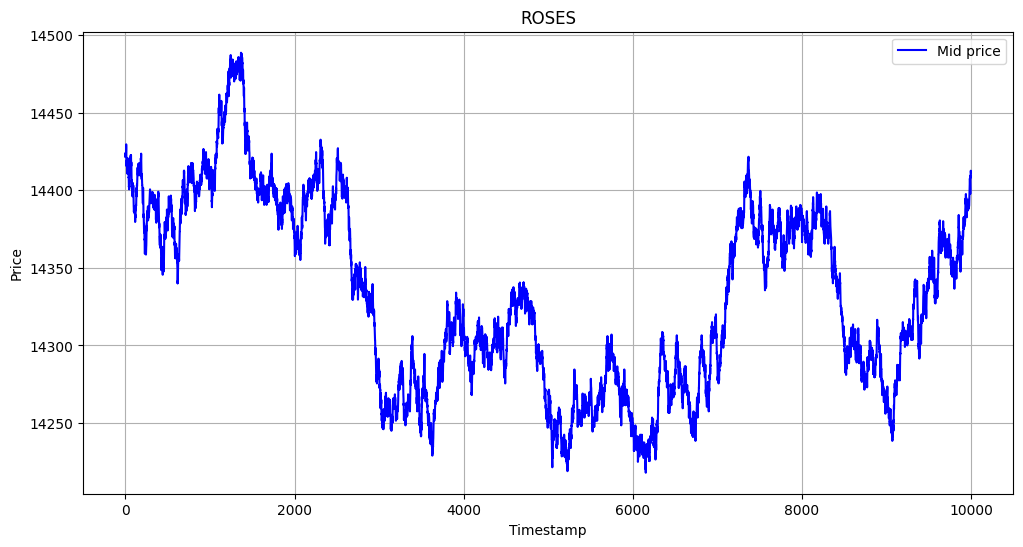

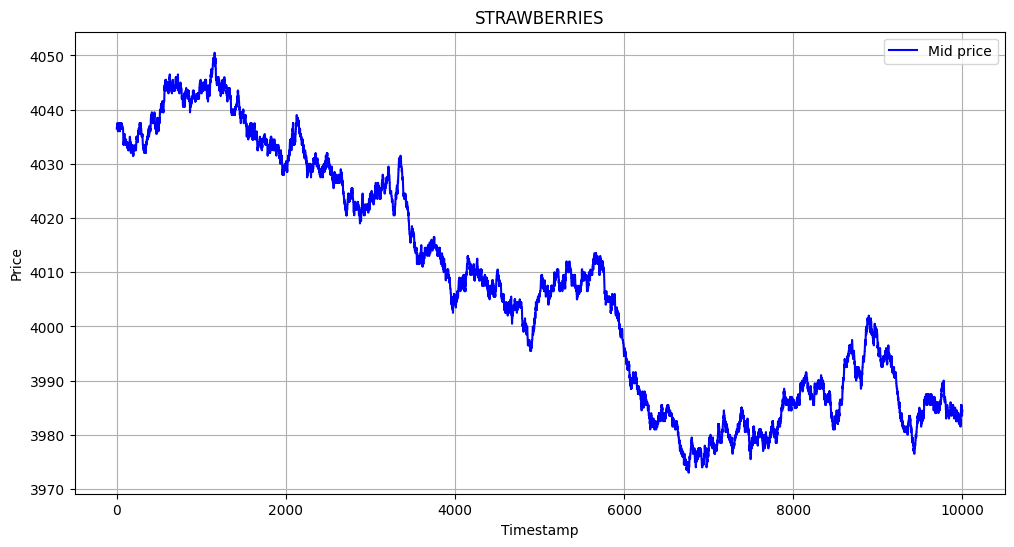

In [36]:
csv_file_path = "./data/round_3/prices_round_3_day_2.csv"
df = pd.read_csv(csv_file_path, sep=';')

products = np.unique(df['product'])

data = {}
stat = 'mid_price'

for prod in products:
    data[prod] = df[df['product'] == prod]
    
plt.figure(figsize=(12, 6))
plt.plot((data["GIFT_BASKET"][stat].values - (1 * data["ROSES"][stat].values + 4 * data["CHOCOLATE"][stat].values)), 
         marker='', linestyle='-', color='b', label="Simulated basket mid price")
# plt.plot((data["GIFT_BASKET"][stat].values), 
#          marker='', linestyle='-', color='b', label="Real basket mid price")
# plt.plot(6 * data["STRAWBERRIES"][stat].values + 4 * data["CHOCOLATE"][stat].values + data["ROSES"][stat].values, 
#          marker='', linestyle='-', color='r', label="Simulated basket mid price")
# plt.plot((data["GIFT_BASKET"]["bid_price_1"].values - data["GIFT_BASKET"]["ask_price_1"].values)[100:200], 
#          marker='', linestyle='-', color='b', label="Real basket bid price")
plt.title("Simulated basket")
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot((data["STRAWBERRIES"][stat].values), marker='', linestyle='-', color='b', label="Simulated basket mid price")
plt.title("Simulated basket")
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()

for prod in products:
    plt.figure(figsize=(12, 6))
    plt.plot(data[prod][stat].values, marker='', linestyle='-', color='b', label="Mid price")
    plt.title(prod)
    plt.xlabel("Timestamp")
    plt.ylabel("Price"),
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [55]:
stock_A_prices = data["GIFT_BASKET"][stat].values 
stock_B_prices = 6 * data["STRAWBERRIES"][stat].values + 4 * data["CHOCOLATE"][stat].values + data["ROSES"][stat].values

# Calculate natural logarithms of prices
log_stock_A_prices = np.log(stock_A_prices)
log_stock_B_prices = np.log(stock_B_prices)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(log_stock_B_prices, log_stock_A_prices)

# The slope of the regression line is the hedge ratio 'n'
hedge_ratio = slope
# print(hedge_ratio)

# print(np.average([1.2136348532078232, 0.9342776440082186, 0.9816819093811936]))

spread = data["GIFT_BASKET"][stat].values - (6 * data["STRAWBERRIES"][stat].values + 4 * data["CHOCOLATE"][stat].values + data["ROSES"][stat].values)

threshold_upper = spread.mean() + 1.5 * spread.std()
threshold_lower = spread.mean() - 1.5 * spread.std()
print(threshold_upper, threshold_lower)

498.1639703170912 242.29722968290875


In [58]:
s = pd.DataFrame(log_stock_A_prices - hedge_ratio * log_stock_B_prices)
t = 10

rolling_mean = s.mean()
rolling_std = s.std()

# Calculate z-score
z_score = (s - rolling_mean) / rolling_std
print(rolling_std)
print(s, z_score)
# 0   -2.380727
# 0    0.739147
# 0    0.209785

# Define threshold range
threshold_lower = -2.0  # Lower threshold as -2 sigma
threshold_upper = -1.5  # Upper threshold as -1.5 sigma


0    0.001143
dtype: float64
             0
0    -2.381407
1    -2.381535
2    -2.381544
3    -2.381589
4    -2.381639
...        ...
9995 -2.378912
9996 -2.379157
9997 -2.379147
9998 -2.379151
9999 -2.379283

[10000 rows x 1 columns]              0
0    -0.594180
1    -0.706455
2    -0.714677
3    -0.753997
4    -0.797058
...        ...
9995  1.587515
9996  1.373792
9997  1.382610
9998  1.379285
9999  1.263770

[10000 rows x 1 columns]


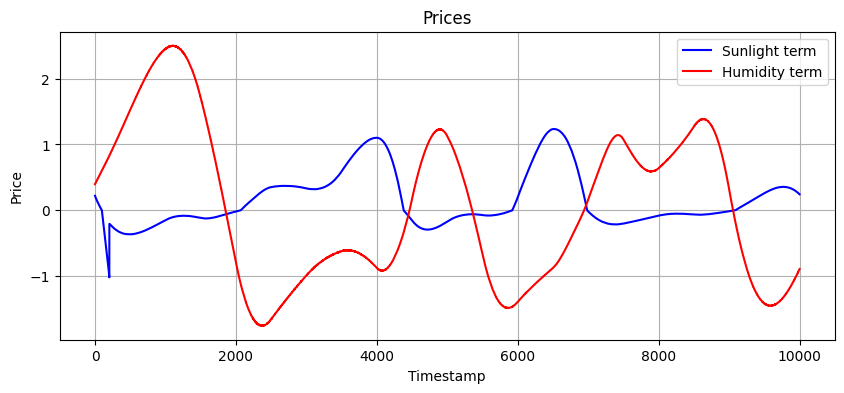

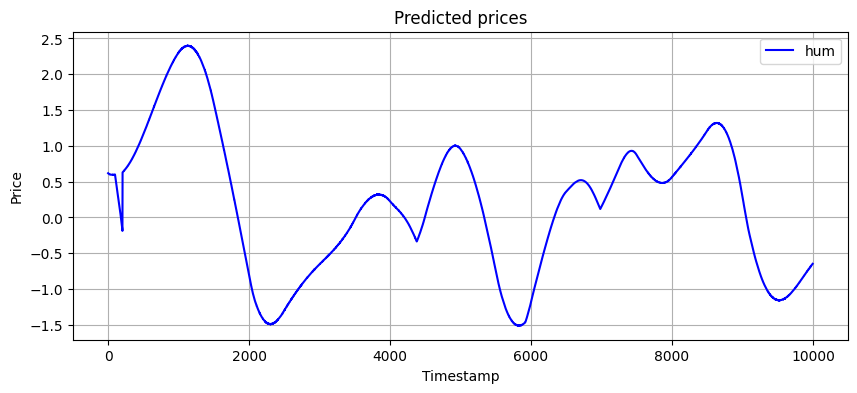

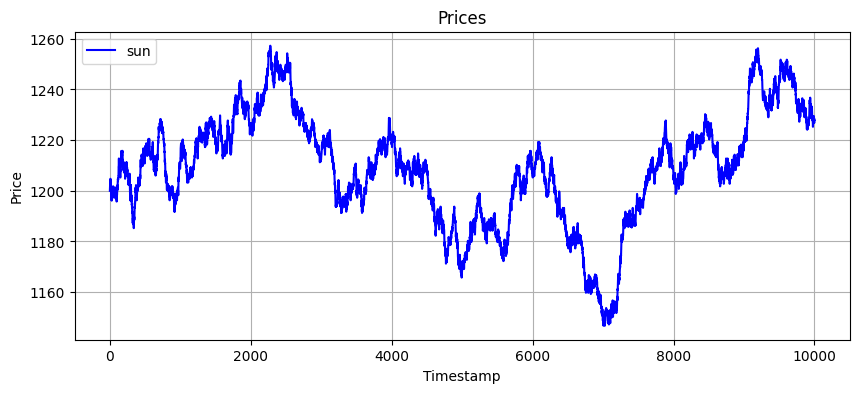

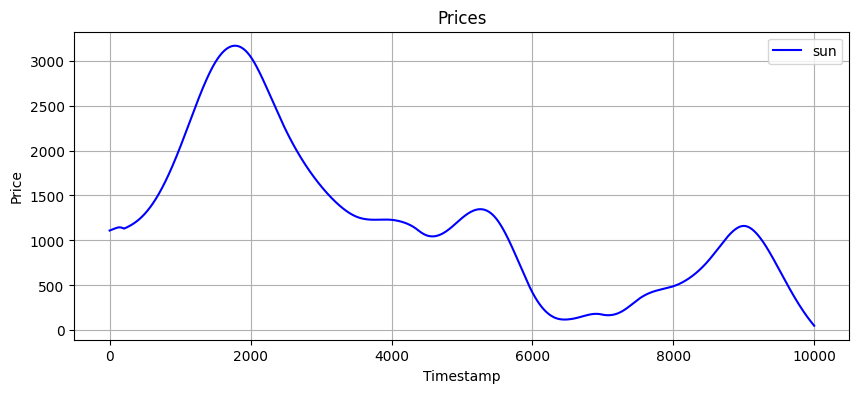

In [45]:
csv_file_path_round_2 = "./data/round_2/prices_round_2_day_-1.csv"
df2 = pd.read_csv(csv_file_path_round_2, sep=';')

prices = []
hum = 'HUMIDITY'
sun = 'SUNLIGHT'
# current_price = 1200
# min_sunlight = 10000 / 24 * 7 # 7 hours of sunlight
# sunlight_diff = min_sunlight / 42 # the sunlight drop that would cause 1% decrease in production
# humidity_diff = 2.5

# for idx in range(len(df2)):
#     current_humidity = df2['HUMIDITY'][idx]
#     current_sunlight = df2['SUNLIGHT'][idx]
#     
#     abs_dif_humidity = 0
#     if current_humidity < 60 or current_humidity > 80:
#         abs_dif_humidity = max(60-current_humidity, current_humidity - 80)
#     elif current_sunlight > min_sunlight:
#         current_price = 1200
#         
#     
#     abs_dif_sunlight = 0
#     if current_sunlight < min_sunlight:
#         abs_dif_sunlight = min_sunlight - current_sunlight
#         
#     percent_change_hum = abs_dif_humidity / humidity_diff
#     percent_change_sunlight = abs_dif_sunlight / sunlight_diff
#     
#     total_percent_change = percent_change_sunlight + percent_change_hum
#     
#     current_price = current_price - total_percent_change / 10000 * current_price
#     
#     prices.append(current_price)

diff_hum = []
diff_sun = []
forecasts = []
pred_prices = []
hum_terms = []
sun_terms = []
prev_price = 1110
for idx in range(3,len(df2)):
    curr_sunlight = df2[sun][idx]
    curr_diff_hum = (df2[hum][idx] - df2[hum][idx-1]) * 80
    curr_diff_sun = df2[sun][idx] - df2[sun][idx-1]
    diff_sun.append(curr_diff_sun)
    diff_hum.append(curr_diff_hum)
    
    sunlight_term = 2 * -curr_diff_sun * (1 - np.sqrt(abs(df2[sun][idx] - 2500) / 2500))

    if (curr_sunlight > 2500 and curr_diff_sun > 0) or (curr_sunlight < 2500 and curr_diff_sun < 0):
        sunlight_term /= 5
    humidity_term = curr_diff_hum * (df2[hum][idx] - 70) / 5 / 1.5
    sun_terms.append(sunlight_term)
    hum_terms.append(humidity_term)
    forecast = sunlight_term + humidity_term
    forecasts.append(forecast)
    pred_price = prev_price + (forecast - 0.3) 
    prev_price = pred_price
    pred_prices.append(pred_price)

plt.figure(figsize=(10, 4))
plt.plot(sun_terms, marker='', linestyle='-', color='b', label='Sunlight term')
plt.plot(hum_terms, marker='', linestyle='-', color='r', label='Humidity term')
plt.title('Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 4))
plt.plot(forecasts, marker='', linestyle='-', color='b', label='hum')
plt.title('Predicted prices')
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df2['ORCHIDS'], marker='', linestyle='-', color='b', label='sun')
plt.title('Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(pred_prices, marker='', linestyle='-', color='b', label='sun')
plt.title('Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()